<a href="https://colab.research.google.com/github/hemakumar5153/cnn-optimization/blob/main/PoolingLayer_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
tensorflow.__version__

'2.9.2'

In [ ]:
import keras
import os
import numpy as np
from google.colab import files
from google.colab import drive
from keras.models import Model
from keras.models import Sequential
from keras.models import Model, load_model
from keras import initializers
from keras import optimizers
from keras.layers import *
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar100
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from tensorflow.keras.datasets import mnist

## Download Pneumonia Dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['PROJ_CONFIG_DIR'] = "/content/gdrive/My Drive/Project"

In [ ]:
%cd /content/gdrive/My Drive/Project/

/content/gdrive/My Drive/Project


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# !kaggle competitions download -c paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:17<00:00, 77.1MB/s]
100% 2.29G/2.29G [00:17<00:00, 141MB/s] 


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
os.listdir('/content/gdrive/MyDrive/Project/chest_xray')

['__MACOSX', 'chest_xray', 'test', 'train', 'val']

In [ ]:
train_folder= '/content/gdrive/MyDrive/Project/chest_xray/train/'
val_folder = '/content/gdrive/MyDrive/Project/chest_xray/val/'
test_folder = '/content/gdrive/MyDrive/Project/chest_xray/test/'

In [ ]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1341
normal picture title:  IM-0471-0001.jpeg
pneumonia picture title: person1149_virus_1925.jpeg


Text(0.5, 1.0, 'Pneumonia')

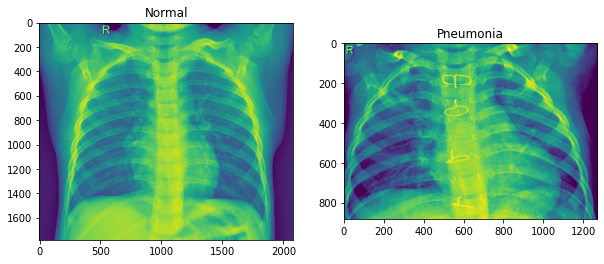

In [ ]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [ ]:
num_of_test_samples = 600
batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range=30, 
                                   zoom_range=0.2, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Project/chest_xray/train/',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Project/chest_xray/val/',
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Project/chest_xray/test/',
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Model 1

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense, BatchNormalization

model1=Sequential()

model1.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(150, 150, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

model1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model1.add(layers.BatchNormalization())

model1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model1.add(layers.BatchNormalization())

model1.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

model1.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model1.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.2))

model1.add(layers.Flatten())

model1.add(layers.Dense(128,activation='relu'))
model1.add(layers.Dropout(0.2))

model1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer='adam')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0

In [ ]:
cnn_model1 = model1.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

163/163 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9237

163/163 [==============================] - 382s 2s/step - loss: 0.2022 - accuracy: 0.9237 - val_loss: 20.6703 - val_accuracy: 0.5000


In [ ]:
test_loss, test_acc = model1.evaluate(test_set, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

20/20 - 15s - loss: 8.0209 - accuracy: 0.6250 - 15s/epoch - 762ms/step
The accuracy of the model is:
0.625


## MODEL 2

In [ ]:


def build_model1(optimizer):
  model=Sequential()
  model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28, 28, 1)))
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
  model.add(layers.MaxPool2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  return model

In [ ]:
optimizers = ['SGD','Adagrad','Adadelta', 'RMSprop', 'Adam']

for i in optimizers:

  print('\n=================== Running with {0} Optimizer ====================\n'.format(i))
  model = build_model1(i)
  hist=model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split = 0.3)
  m1=model.evaluate(X_test, y_test)

  print('\n Model test accuracy with {0} optimizer is {1:.2%} \n'.format(i,m1[1]))


=================== Running with SGD Optimizer ====================

Epoch 1/10
1313/1313 [==============================] - 22s 7ms/step - loss: 1.2994 - accuracy: 0.5436 - val_loss: 0.2679 - val_accuracy: 0.9320
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3415 - accuracy: 0.8923 - val_loss: 0.1459 - val_accuracy: 0.9578
Epoch 3/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2292 - accuracy: 0.9292 - val_loss: 0.1096 - val_accuracy: 0.9691
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1817 - accuracy: 0.9420 - val_loss: 0.0904 - val_accuracy: 0.9727
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1552 - accuracy: 0.9514 - val_loss: 0.0784 - val_accuracy: 0.9759
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1332 - accuracy: 0.9580 - val_loss: 0.0800 - val_accuracy: 0.9748
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/st

In [ ]:
######################################################